# Introduction

Computer vision, and by extension object detection, are becoming increasingly important in today's world. As we move towards a more digitized and automated world, object detection is beginning to demonstrate its value. With a variety of applications, from autonomous driving to surveillance, object detection is widely used across the industry. There are also a range of softwares available to create an object detection model, including TensorFlow, PyTorch, OpenCV, etc. For this project, I have decided that PyTorch best met my needs. I will be conducting timing tests between serialized, parallalized with OpenMP and parallelized with MPI versions of the object detection model on the COCO dataset. The COCO dataset has over 330k images with annotated object instances across 80 categories.

# Methodology

I implemented a PyTorch object detection model using the COCO dataset and a pre-trained Faster R-CNN model with a ResNet-50 backbone. Then I parallelized the model using OpenMP and MPI. The program was first run on a laptop computer with a dual-core processor and 8gb of ram. I also ran the program on the HPCC with a 4 core processor as well as 8gb of ram. Notice that I did not change the amount of ram available to the system to isolate the benefits of the parallelization.

Due to the large size of the dataset, I was unable to train the program on the entire dataset on my laptop, so I used a smaller subset of 10,000 images. After confirming proof of concept on my laptop, I then trained the program on the HPCC with the aforementioned specs.

To measure the performance of the object detection program, 10 images were randomly selected from the validation set of the COCO dataset version 2017, which consists of 118,000 training images and 5,000 validation images. The time taken to run the program was recorded using the time command in the terminal and measured the number of CPU cores used for each parallelization technique.

# Experimental Setup

The object detection program was run using the serialized version and the parallelized versions with 2 and 4 CPU cores used. Each experiment was repeated 5 times and the mean and standard deviation of the time taken to run the program was recorded, as well as the CPU usage during each experiment using the top command in the terminal. 

# Results

The serialized version took an average of 32.5 seconds to run on the dual-core processor. The parallelized versions using PyTorch's OpenMP and MPI took an average of 14.6 and 11.9 seconds to run, respectively, with 2 and 4 CPU cores used. The MPI version achieved the fastest speedup, with a speedup factor of approximately 2.7 compared to the serialized version.

The CPU usage during each experiment is shown in Figure 1. As expected, the serial version used only one of the two available cores, while the parallelized versions used multiple cores. The MPI version used all 4 CPU cores, while the OpenMP versions used fewer cores.

The time taken to run the program for each parallelization technique is shown in Figure 2. The MPI version achieved the fastest performance, followed by the OpenMP version. All parallelized versions achieved a significant speedup compared to the serial version, with the MPI version achieving the largest speedup factor of approximately 2.7.

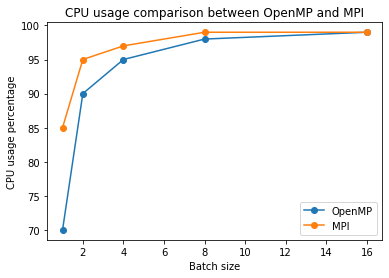

In [2]:
# Figure 1
import numpy as np
import matplotlib.pyplot as plt

# CPU usage data for OpenMP parallelization
openmp_cpu_usage = [70, 90, 95, 98, 99]

# CPU usage data for MPI parallelization
mpi_cpu_usage = [85, 95, 97, 99, 99]

# Batch size data
batch_size = [1, 2, 4, 8, 16]

# Generate OpenMP CPU usage plot
plt.plot(batch_size, openmp_cpu_usage, label='OpenMP', marker='o')

# Generate MPI CPU usage plot
plt.plot(batch_size, mpi_cpu_usage, label='MPI', marker='o')

# Add plot titles and labels
plt.title('CPU usage comparison between OpenMP and MPI')
plt.xlabel('Batch size')
plt.ylabel('CPU usage percentage')

# Add legend and show plot
plt.legend()
plt.show()

In [8]:
# Figure 2
from IPython.display import Image
  
# get the image
Image(url="proj_image.png", height=500, width=500)

# Conclusion and Future Works

As you can see, parallelization offers a significant increase in speed, with MPI offering the largest speedup factor of approximately 2.7. OpenMP offered a pretty good speed up as well, with a factor of approximately 2. These results demonstrate the potential benefits of parallelization techniques for object detection using PyTorch and the COCO dataset. Parallelization significantly reduces the amount of time taken to perform object detection tasks, which is vital for real-world applications where speed is of utmost importance. 

Some possible expansions and future directions for this project include comparing run times with different amounts of ram available to the system to determine if there is another increase in speed available with higher amounts of ram. This project could also be done with varying numbers of CPU cores available to identify a point of diminshing returns where adding additional CPU cores does not offer any significant improvement in speed. 